<a href="https://colab.research.google.com/github/henrykosasih333-collab/weekly-assessment-ML-SESSION./blob/main/Copy_of_Template_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEMPLATE WEEKLY ASSESSMENT**

## **Judul Proyek**

Nama :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Library**

In [ ]:
!pip -q install kaggle

In [ ]:
# Buat directory folder Kaggle
!mkdir ~/.kaggle

In [ ]:
# Load file kaggle.json di google drive yang tersimpan
!cp /content/drive/MyDrive/.kaggle/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset dari kaggle dan simpan dalam folder google drive
!kaggle datasets download altavish/boston-housing-dataset -p /content/drive/MyDrive/Proyek/Data

Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset
License(s): CC0-1.0
boston-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip file dataset berdasarkan path folder cloud drive
!unzip /content/drive/MyDrive/Proyek/Data/boston-housing-dataset.zip -d /content/drive/MyDrive/Proyek/Data

Archive:  /content/drive/MyDrive/Proyek/Data/boston-housing-dataset.zip
  inflating: /content/drive/MyDrive/Proyek/Data/HousingData.csv  


In [ ]:
# Import Library
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
# Visualization
import scipy.stats as stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import zscore
import plotly.graph_objects as go
# Modelling Helpers :
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestRegressor
# Mencari model dengan setting-an hyperparameter terbaik
from sklearn.model_selection import train_test_split, GridSearchCV
# Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# save model untuk deploy
import joblib
import pickle
# Deep Learning Libraries
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten

## **Load Dataset**

In [ ]:
#Memeriksa data NaN secara keseluruhan
house.isna().values.any()

np.True_

In [ ]:
# Periksa duplicate value
house.duplicated().sum()snip

np.int64(0)

In [ ]:
house.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
house_filled = house.fillna(0)
print(house)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [ ]:
# Load dataset berdasarkan data yang disimpan dalam folder drive
import pandas as pd
house = pd.read_csv('/content/drive/MyDrive/Proyek/Data/HousingData.csv')
house.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## **Exploratory Data Analysis**

Lakukan pengolahan data yang dianalisa sesuai kasus dan kebutuhan yang diperoleh. Dalam tahapan EDA (Exploratory Data Analysis) yaitu,

1. **Mengetahui Informasi Dataset**
2. **Analisa Berdasarkan Statistik**
3. **Visualisasi Data**
4. **Feature Engineering**
5. **Splitting Dataset**

In [ ]:
# Mengetahui informasi dataset
house.info()
print("Shape of data:")
print(house.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
Shape of data:
(506, 14)


In [ ]:
# Analisa berdasarkan statistik deskriptif
house.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


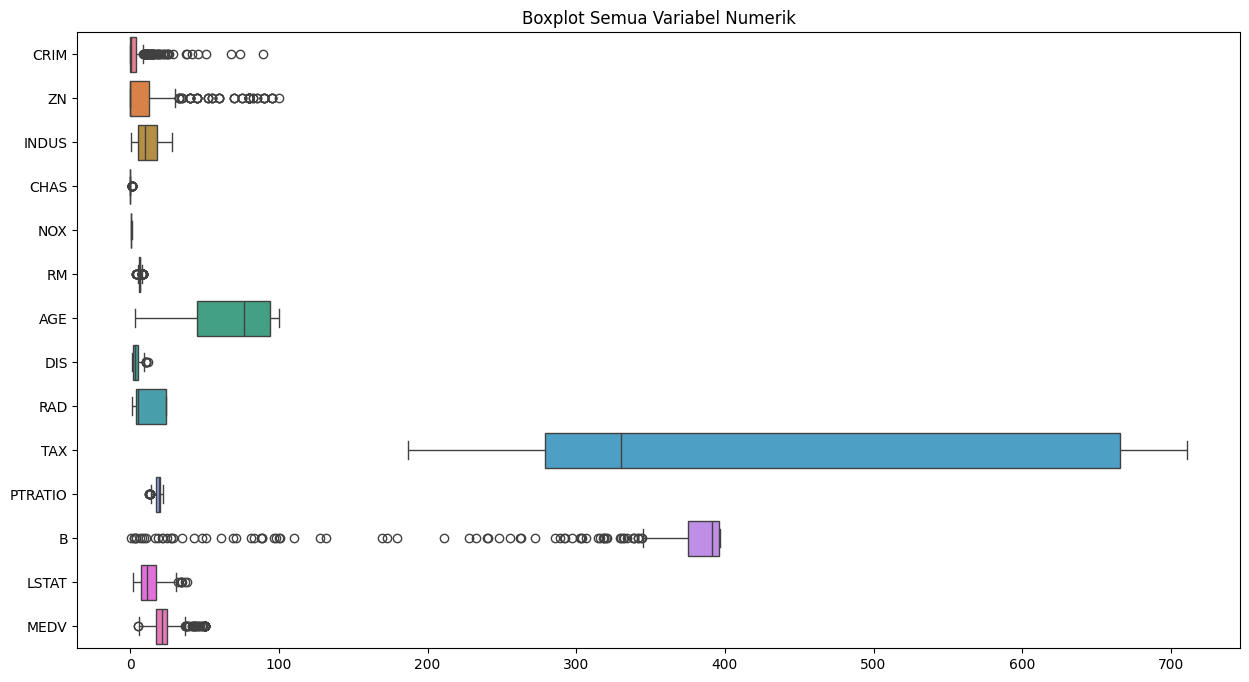

In [ ]:
# Visualisasi data dengan Boxplot atau plot lain yang relevan
plt.figure(figsize=(15,8))
sns.boxplot(data=house, orient="h")
plt.title("Boxplot Semua Variabel Numerik")
plt.show()

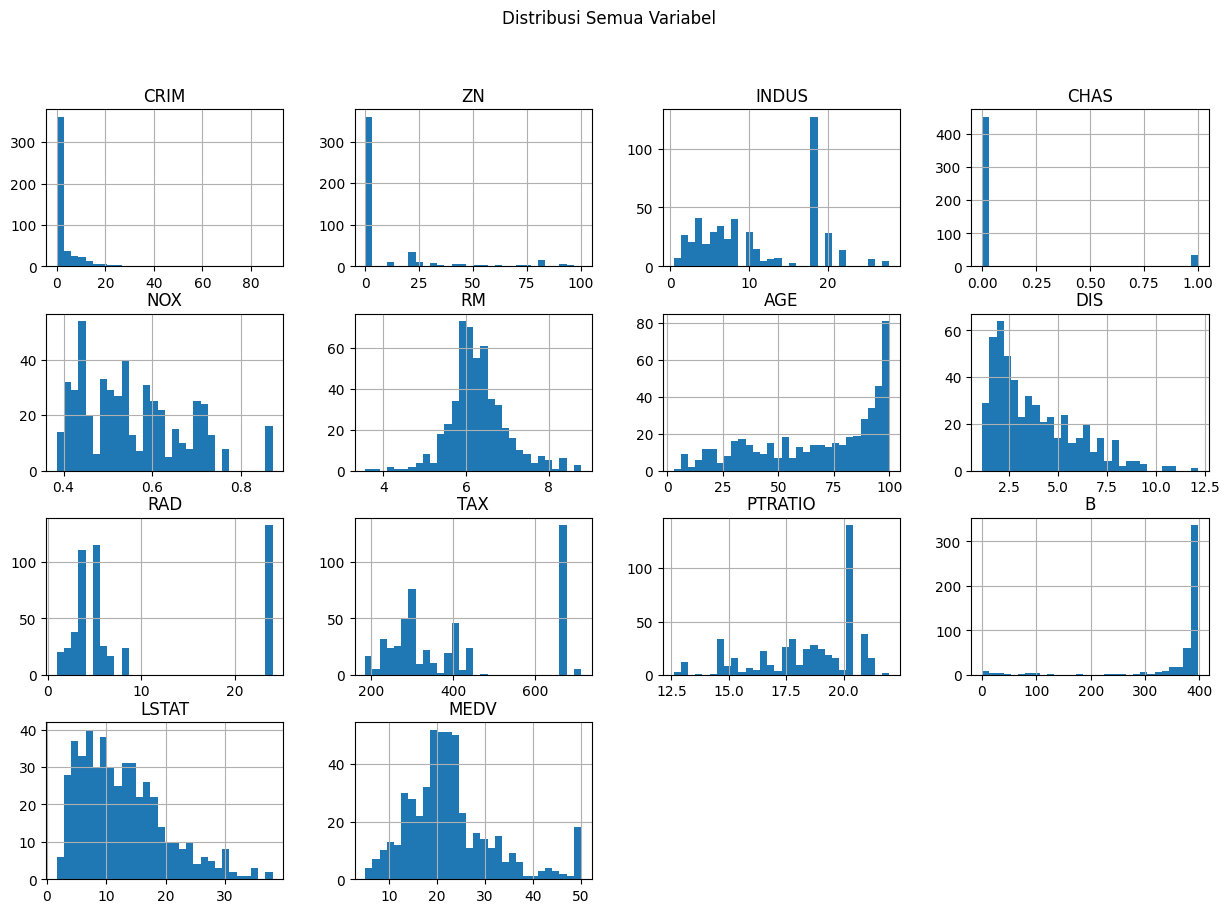

In [ ]:
#Untuk melihat distribusi tiap variabel:
house.hist(figsize=(15,10), bins=30)
plt.suptitle("Distribusi Semua Variabel")
plt.show()

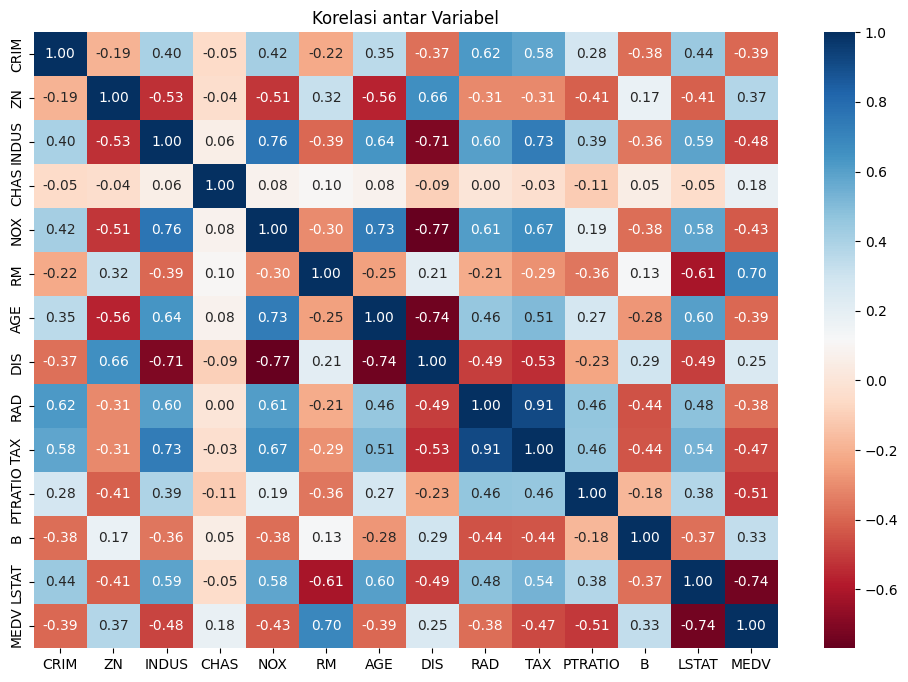

In [ ]:
# Lakukan pemilihan fitur berdasarkan korelasi data
corr = house.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="RdBu", fmt=".2f")
plt.title("Korelasi antar Variabel")
plt.show()

In [ ]:
#Korelasi tiap fitur dengan MEDV
corr_medv = corr['MEDV'].sort_values(ascending=False)
print("Korelasi fitur dengan MEDV:")
print(corr_medv)

Korelasi fitur dengan MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


Kesimpulan=

Biasanya hasil korelasi dengan MEDV (harga rumah) adalah:

Positif kuat:

RM (0.70) = semakin banyak kamar, harga rumah akan naik. disini RM sangat tinggi dibandingkan ZN dan B

ZN (0.36) = area perumahan elit, harga rumah akan naik.

B (0.33) = area etnis ras tertentu pengaruhi suatu harga rumah cuma minim, disini area ras gak terlalu mempengaruhi

Negatif kuat:

LSTAT (-0.74) = semakin banyak penduduk sosial ekonomi miskin, harga rumah akan turun.

PTRATIO (-0.51) = rasio murid-guru di sekolah tinggi (sekolah buruk), harga rumah akan turun.

INDUS (-0.48) = Semakin tinggi nilai INDUS, artinya daerah lebih banyak kawasan industri maka harga rumah turun.

NOX (-0.43) = Semakin tinggi nilai NOX, kualitas lingkungan makin buruk maka harga rumah akan turun.

In [ ]:
# Pisahkan data dengan metode hold out ratio dengan 80:20 atau 70:30
# X = semua feature kecuali MEDV (Y/dependen variable)
X = house.drop('MEDV', axis=1)
# y = Target
y = house['MEDV']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("Ukuran data Training:", X_train.shape)
print("Ukuran data Testing:", X_test.shape)

Ukuran data Training: (404, 13)
Ukuran data Testing: (102, 13)


In [ ]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Ukuran data Training:", X_train.shape)
print("Ukuran data Testing:", X_test.shape)

Ukuran data Training: (354, 13)
Ukuran data Testing: (152, 13)


## **Modelling**

Gunakan pemodelan dengan algoritma machine learning berdasarkan kasus dan data yang diimplementasikan.

Evaluasi Model pada DATA TRAINING:
MAE: 3.3479855882272695
MSE: 22.684105665104973
RMSE: 4.762783394728861
R2 Score: 0.7388831948069796

Evaluasi Model pada DATA TESTING:
MAE: 3.2140386828286074
MSE: 25.929696549627213
RMSE: 5.092121026608383
R2 Score: 0.6464153977582272


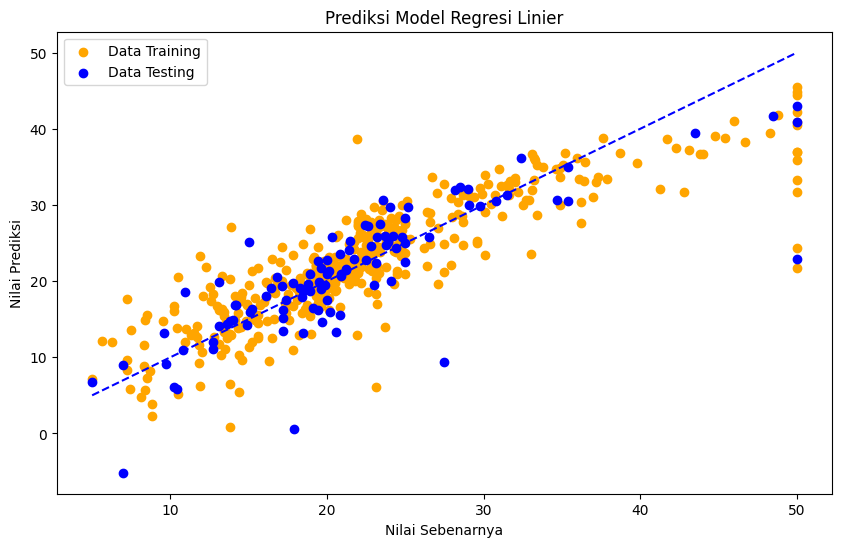

In [ ]:
#Implementasi dengan Linear Regression
# Use the DataFrame with filled missing values
X = house_filled.drop('MEDV', axis=1)
y = house_filled['MEDV']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Linear Regression
model = LinearRegression()

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung MAE, MSE, RMSE dan R2 Score untuk DATA TRAINING
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Menghitung MAE, MSE, dan R2 Score untuk DATA TESTING
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model pada DATA TRAINING:")
print(f'MAE: {mae_train}')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'R2 Score: {r2_train}')
print("\nEvaluasi Model pada DATA TESTING:")
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'R2 Score: {r2_test}')

# Visualisasi regresi untuk data latih dan data uji
plt.figure(figsize=(10, 6))
# Plot data Training
plt.scatter(y_train, y_train_pred, color='orange', label='Data Training')

# Plot data Testing
plt.scatter(y_test, y_pred, color='blue', label='Data Testing')

# Plot garis identitas
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color = 'blue')

# Label sumbu x dan y
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')

# Judul plot
plt.title('Prediksi Model Regresi Linier')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Hasil Evaluasi =

Data Training:

MAE = 3.35

RMSE = 4.76

R² = 0.739

Data Testing:

MAE = 3.21

RMSE = 5.09

R² = 0.646


Training Set:

MAE ≈ 3.35 → rata-rata prediksi harga rumah meleset sekitar $3,350

RMSE ≈ 4.76 → ada error rata-rata sekitar $4,760

R² ≈ 0.74 → model menjelaskan 74% variasi harga rumah di data training

Testing Set:

MAE ≈ 3.21 → rata-rata meleset sekitar $3,210

RMSE ≈ 5.09 → rata-rata error sekitar $5,090

R² ≈ 0.65 → model menjelaskan 65% variasi harga rumah di data testing


INTEPRETASI =
1. Tidak overfitting
 R² training (0.74) dan testing (0.65) tidak jauh berbeda artinya model masih menghasilkan perbedaan dengan baik.

2. Tidak underfitting
 R² cukup tinggi (0.65–0.74) → model sudah menangkap hubungan penting, misalnya:

RM (jumlah kamar) → semakin banyak kamar, harga naik.

ZN (persentase area perumahan elit) → harga cenderung naik.

LSTAT (persentase penduduk berstatus sosial rendah) → harga turun.

Error di training vs testing juga mirip :
  1.MAE training = 3.35, testing = 3.21 → hampir sama.
  2.RMSE training = 4.76, testing = 5.09 → juga dekat.
  Error rata-rata sekitar $3k–5k itu relatif wajar untuk harga rumah
Kalau perbedaan jauh → baru indikasi overfitting/underfitting.

sehingga ini dapat disimpulkan uji modeling data boston termasuk **Good fitting**.


## **Evaluation The Model**

Gunakan evaluasi metriks yang tepat dalam implementasi model machine learning yang digunakan.

Dalam kasus model Regresi gunakan evaluasi metriks,

*   **Mean Squared Error (MSE)**
*   **Mean Absolute Error (MAE)**
*   **Root Mean Squared Error (RMSE)**
*   **R2-Squared (Koefisien Determinasi)**

Namun, apabila menggunakan model Klasifikasi maka dilakukan evaluasi metriks yaitu,

*   **Akurasi (Accuracy)**
*   **Presisi (Precision)**
*   **Recall**
*   **Confusion Matrix**

In [ ]:
#model Klasifikasi
#Buat target biner: 1 kalau harga >= median, 0 kalau di bawah median
median_value = house['MEDV'].median()
house['MEDV_Class'] = np.where(house['MEDV'] >= median_value, 1, 0)

X = house_filled.drop('MEDV', axis=1)  #FEATURE
y = house['MEDV_Class']                #TARGET

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluasi dengan MATRIX KLASIFIKASI :

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("Confusion Matrix:\n", cm)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Accuracy : 0.8529411764705882
Precision: 0.8461538461538461
Recall   : 0.8627450980392157
Confusion Matrix:
 [[43  8]
 [ 7 44]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.85      0.86      0.85        51

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.85      0.85      0.85       102



Accuracy 0.85–0.86 → model benar sekitar 85–86% dari semua prediksi.

Precision ~0.84–0.85 → dari semua rumah yang diprediksi mahal, sekitar 84–85% benar-benar mahal.

Recall ~0.86 → dari semua rumah mahal sebenarnya, sekitar 86% berhasil terdeteksi.

Confusion Matrix → misalnya [45 8; 7 44] artinya:

45 rumah murah terdeteksi benar

8 rumah murah salah diprediksi mahal

7 rumah mahal salah diprediksi murah

44 rumah mahal benar diprediksi mahal